This notebook demonstrates the internal structure ofnetCDF4 files containing AEM data.

Neil Symington
neil.symington@ga.gov.au

In [12]:
%matplotlib inline

In [13]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# open the file

infile = r"C:\Users\PCUser\Desktop\2017_HowardsEast_SkyTEM\01_EM\AUS_10021_HowardE_EM_meta.nc"

d = netCDF4.Dataset(infile, 'r')


In [16]:
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Dataset read from ASEG-GDF file AUS_10021_HowardE_EM_temp.dat
    Conventions: CF-1.6,ACDD-1.3
    featureType: trajectory
    geospatial_vertical_min: -999999.9
    geospatial_vertical_max: 1189.2
    geospatial_vertical_units: m
    geospatial_vertical_resolution: point
    geospatial_vertical_positive: up
    history: Converted from ASEG-GDF file C:\Users\PCUser\Desktop\2017_HowardsEast_SkyTEM\01_EM\AUS_10021_HowardE_EM_temp.dat using definitions file C:\Users\PCUser\Desktop\2017_HowardsEast_SkyTEM\01_EM\AUS_10021_HowardE_EM_editted.dfn
    date_created: 2019-11-28T08:24:31.484074
    geospatial_east_resolution: point
    geospatial_north_resolution: point
    geospatial_lon_min: 131.00625610351562
    geospatial_lon_max: 131.23486328125
    geospatial_lon_units: degrees East
    geospatial_lat_min: -12.641641616821289
    geospatial_lat_max: -12.372103691101074
    geospatial_lat_units:

In [17]:
d['line'][:]

masked_array(data=[100101, 100201, 100301, 100401, 100501, 100601, 100701,
                   100702, 100801, 100802, 100901, 100902, 101001, 101003,
                   101101, 101102, 101201, 101202, 101301, 101302, 101401,
                   101402, 101501, 101502, 101601, 101602, 101604, 101701,
                   101702, 101801, 101803, 101901, 101903, 102001, 102003,
                   102101, 102103, 102201, 102203, 102301, 102303, 102401,
                   102402, 102404, 102501, 102502, 102504, 102601, 102602,
                   102701, 102702, 102801, 102802, 102901, 102902, 103001,
                   103002, 103101, 103103, 103201, 103202, 103301, 103302,
                   103304, 103401, 103551, 103601, 103701, 103801, 103901,
                   104001, 104101, 104201, 104301, 104401, 104501, 104601,
                   104701, 104801, 104901, 105001, 105101, 105201, 105301,
                   105401, 105501, 105601, 105701, 105801, 105901, 106001,
                   106101

In [18]:
# Now lets get a particular line

line = 114901

# Find the line index from the line name

line_ind = np.where(d['line'][:] == 114901)[0][0]

# Now find the values in the line index variable that are eqal to the line index

line_mask = np.where(d['line_index'][:] == line_ind)[0]

print(line_mask)

[124565 124566 124567 124568 124569 124570 124571 124572 124573 124574
 124575 124576 124577 124578 124579 124580 124581 124582 124583 124584
 124585 124586 124587 124588 124589 124590 124591 124592 124593 124594
 124595 124596 124597 124598 124599 124600 124601 124602 124603 124604
 124605 124606 124607 124608 124609 124610 124611 124612 124613 124614
 124615 124616 124617 124618 124619 124620 124621 124622 124623 124624
 124625 124626 124627 124628 124629 124630 124631 124632 124633 124634
 124635 124636 124637 124638 124639 124640 124641 124642 124643 124644
 124645 124646 124647 124648 124649 124650 124651 124652 124653 124654
 124655 124656 124657 124658 124659 124660 124661 124662 124663 124664
 124665 124666 124667 124668 124669 124670 124671 124672 124673 124674
 124675 124676 124677 124678 124679 124680 124681 124682 124683 124684
 124685 124686 124687 124688 124689 124690 124691 124692 124693 124694
 124695 124696 124697 124698 124699 124700 124701 124702 124703 124704
 12470

In [19]:
# Use the line mask to get for example easting and northing

easting = d['easting'][line_mask]
northing = d['northing'][line_mask]

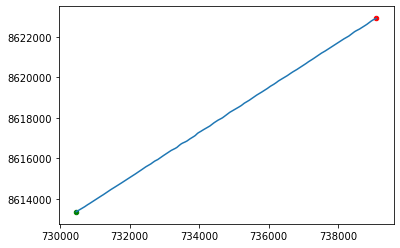

In [20]:
#Plot the line trace with the start and end points
# in red and green
plt.plot(easting, northing)
plt.scatter(easting[0], northing[0], c = 'red', s  = 20)
plt.scatter(easting[-1], northing[-1], c = 'green', s = 20)
plt.show()

In [21]:
# The data an be extracted in a similar way

lm_dat = d['low_moment_Z-component_EM_data'][line_mask]
hm_dat = d['high_moment_Z-component_EM_data'][line_mask]

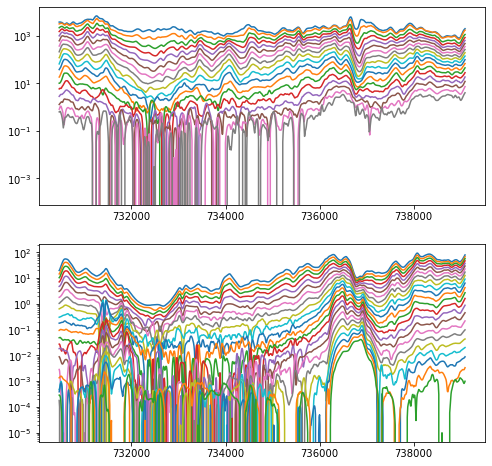

In [24]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (8,8))
                               
ax1.plot(easting, lm_dat)
ax2.plot(easting, hm_dat)
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show()

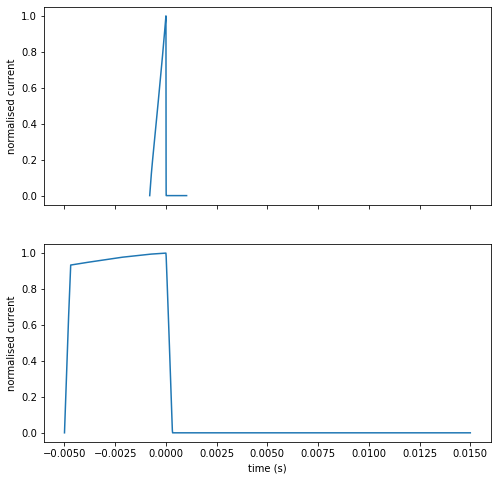

In [28]:
# Here we have a quick look at the metadata

# Dimensions for the current times
lm_current_times = d["low_moment_current_time"][:]
lm_current= d["low_moment_waverform_current"][:]

hm_current_times = d["high_moment_current_time"][:]
hm_current= d["high_moment_waverform_current"][:]

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (8,8),
                              sharex = True)
                               
ax1.plot(lm_current_times, lm_current)
ax2.plot(hm_current_times, hm_current)
ax1.set_ylabel('normalised current')
ax2.set_ylabel('normalised current')
ax2.set_xlabel('time (s)')
plt.show()

In [29]:
d.close()